In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

In [4]:
df=pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.describe(include='object')

,species
count,150
unique,3
top,Iris-setosa
freq,50


In [14]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
count_iris=df['species'].value_counts()
count_iris

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

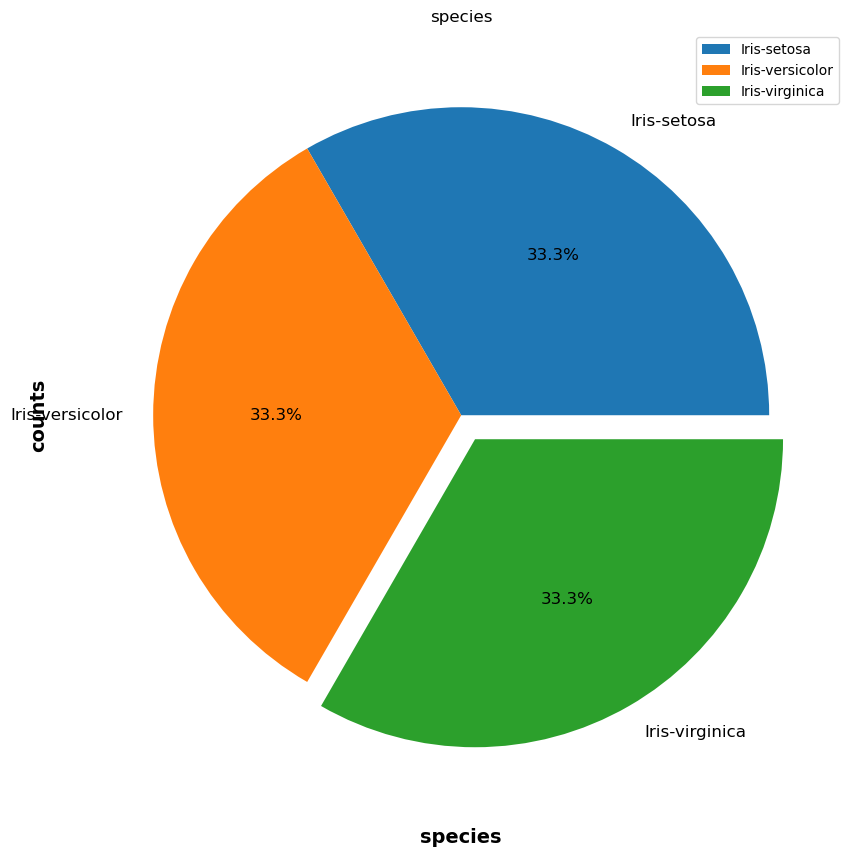

In [18]:
plt.figure(figsize = (20, 10))
explode = (0,0,0.09)
count_iris.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('species')
plt.xlabel('species', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = count_iris.index, loc = "best")
plt.show()

<Axes: >

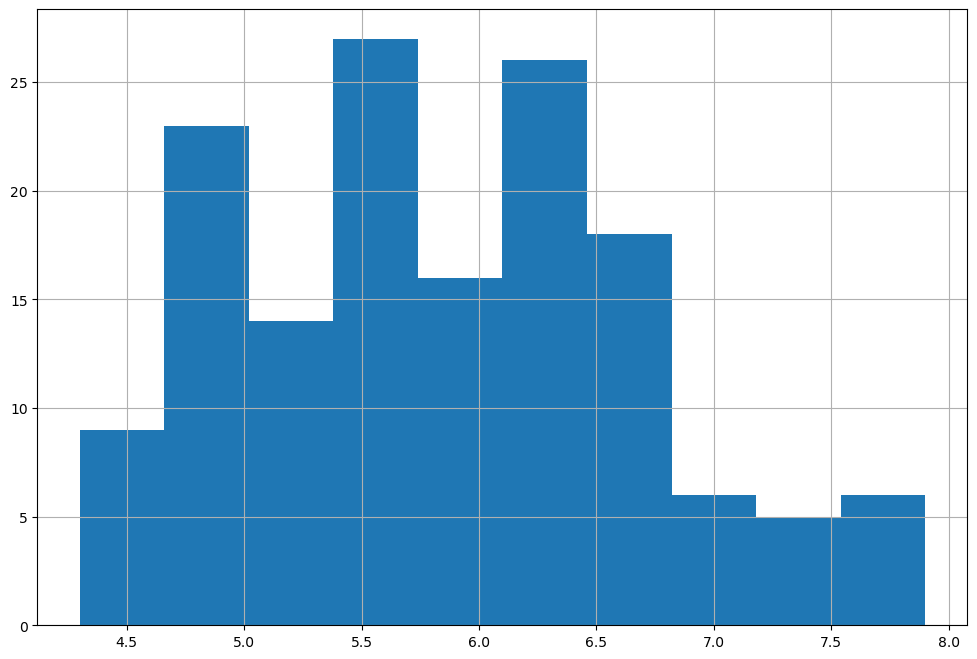

In [20]:
df['sepal_length'].hist(figsize = (12,8))

<Axes: >

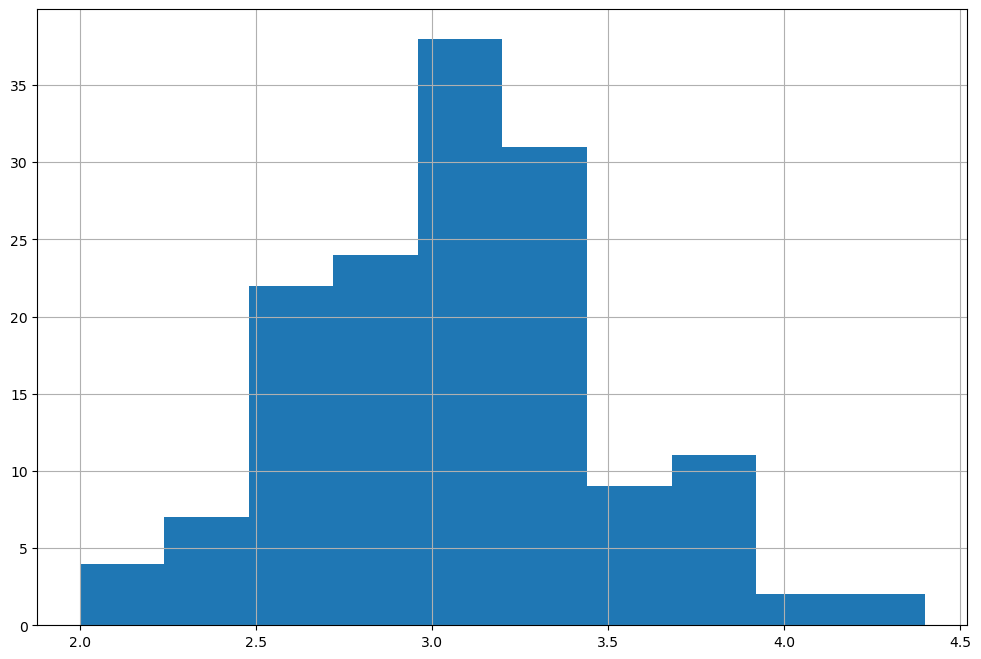

In [22]:
df['sepal_width'].hist(figsize = (12,8))

<Axes: >

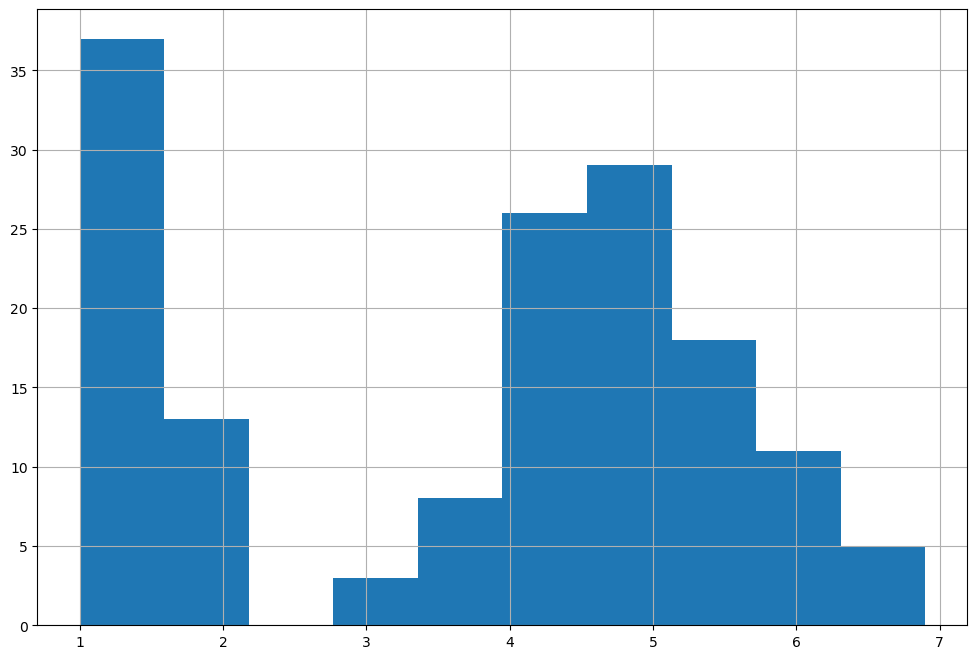

In [24]:
df['petal_length'].hist(figsize = (12,8))

<Axes: >

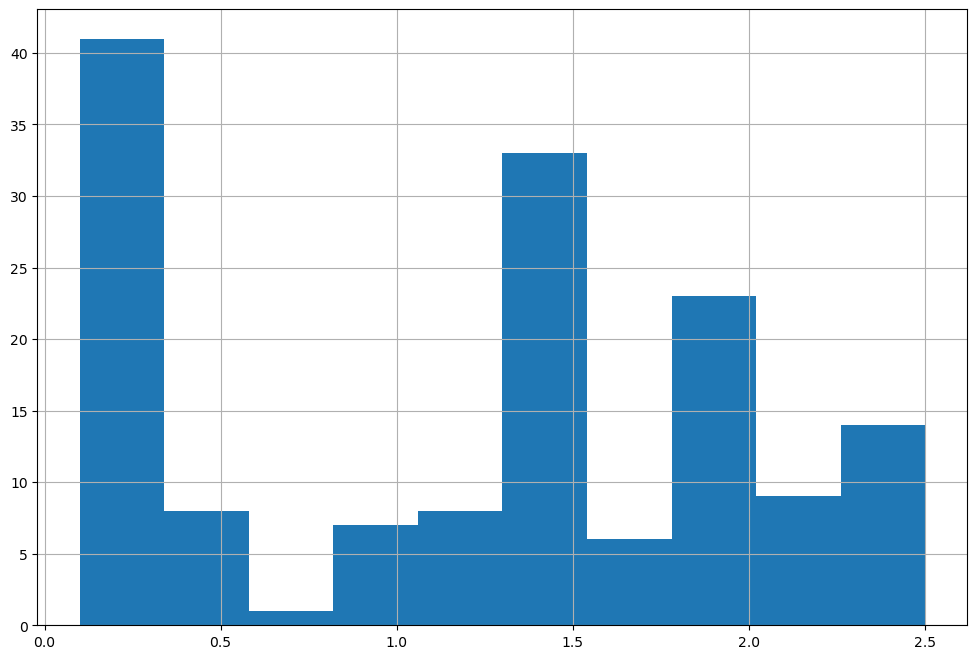

In [28]:

df['petal_width'].hist(figsize = (12,8))

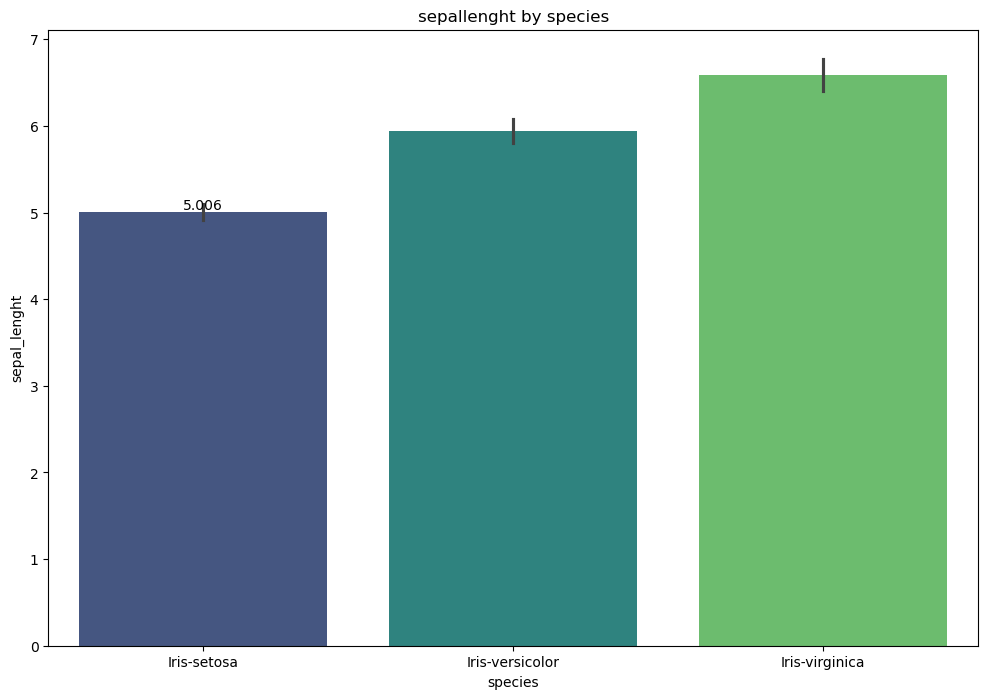

In [34]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df['species'], y=df['sepal_length'], hue=df['species'], palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('sepallenght by species')
plt.xlabel('species')
plt.ylabel('sepal_lenght')
plt.show()



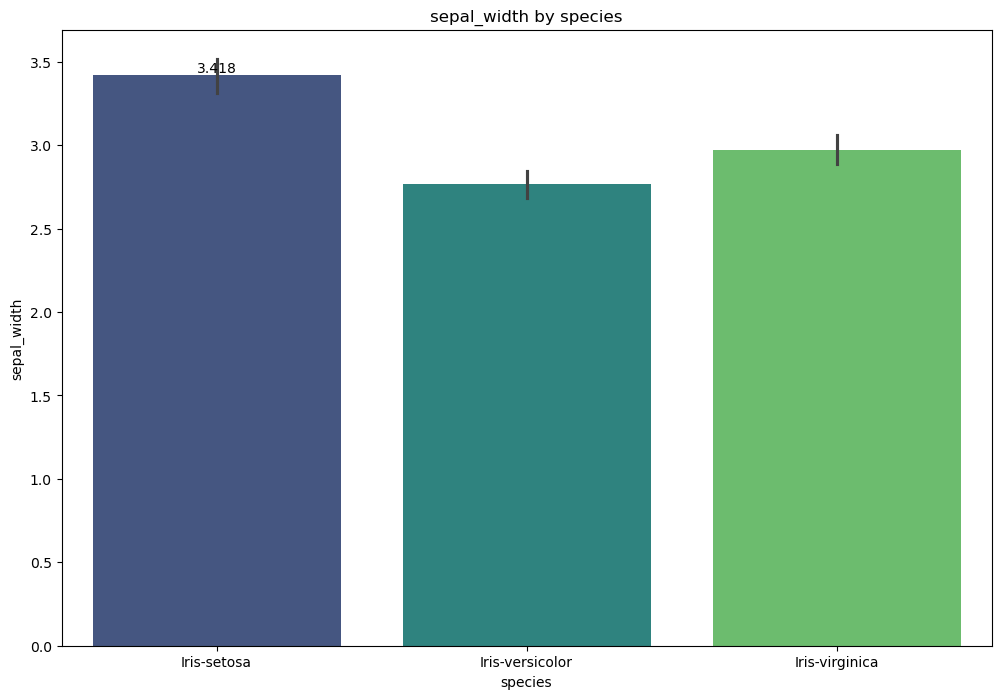

In [38]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df['species'], y=df['sepal_width'], hue=df['species'], palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('sepal_width by species')
plt.xlabel('species')
plt.ylabel('sepal_width')
plt.show()

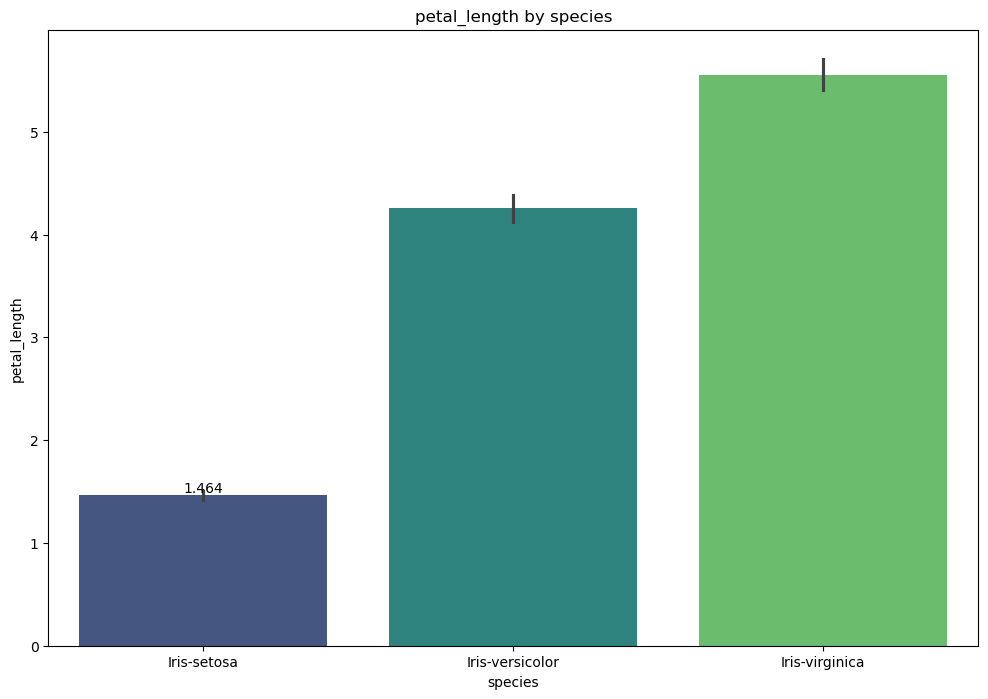

In [42]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df['species'], y=df['petal_length'], hue=df['species'], palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('petal_length by species')
plt.xlabel('species')
plt.ylabel('petal_length')
plt.show()

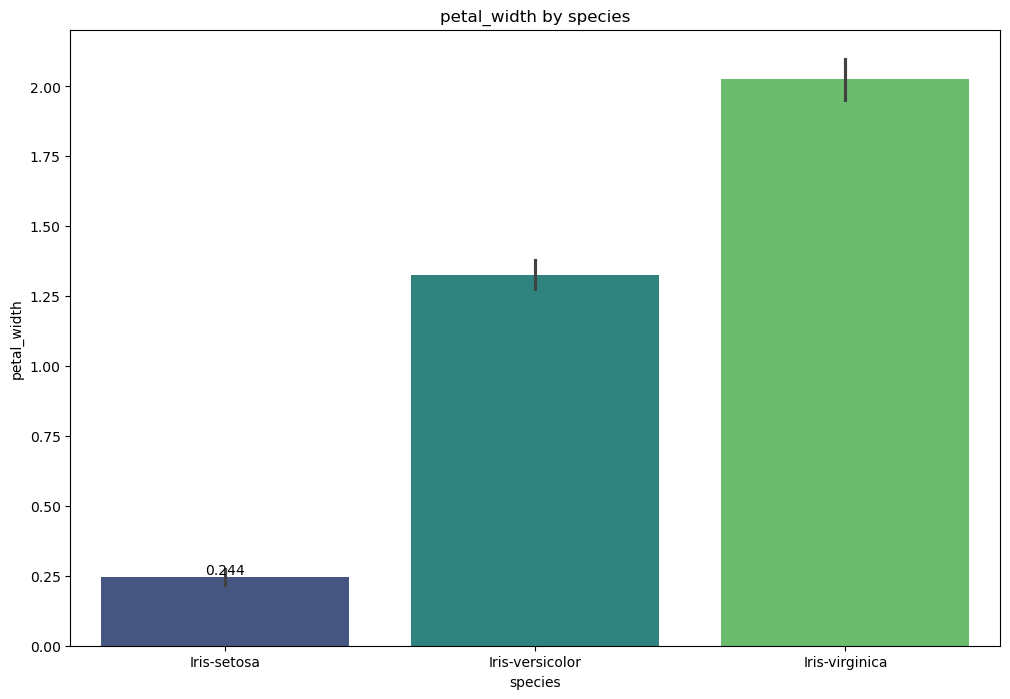

In [46]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df['species'], y=df['petal_width'], hue=df['species'], palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('petal_width by species')
plt.xlabel('species')
plt.ylabel('petal_width')
plt.show()

In [50]:
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


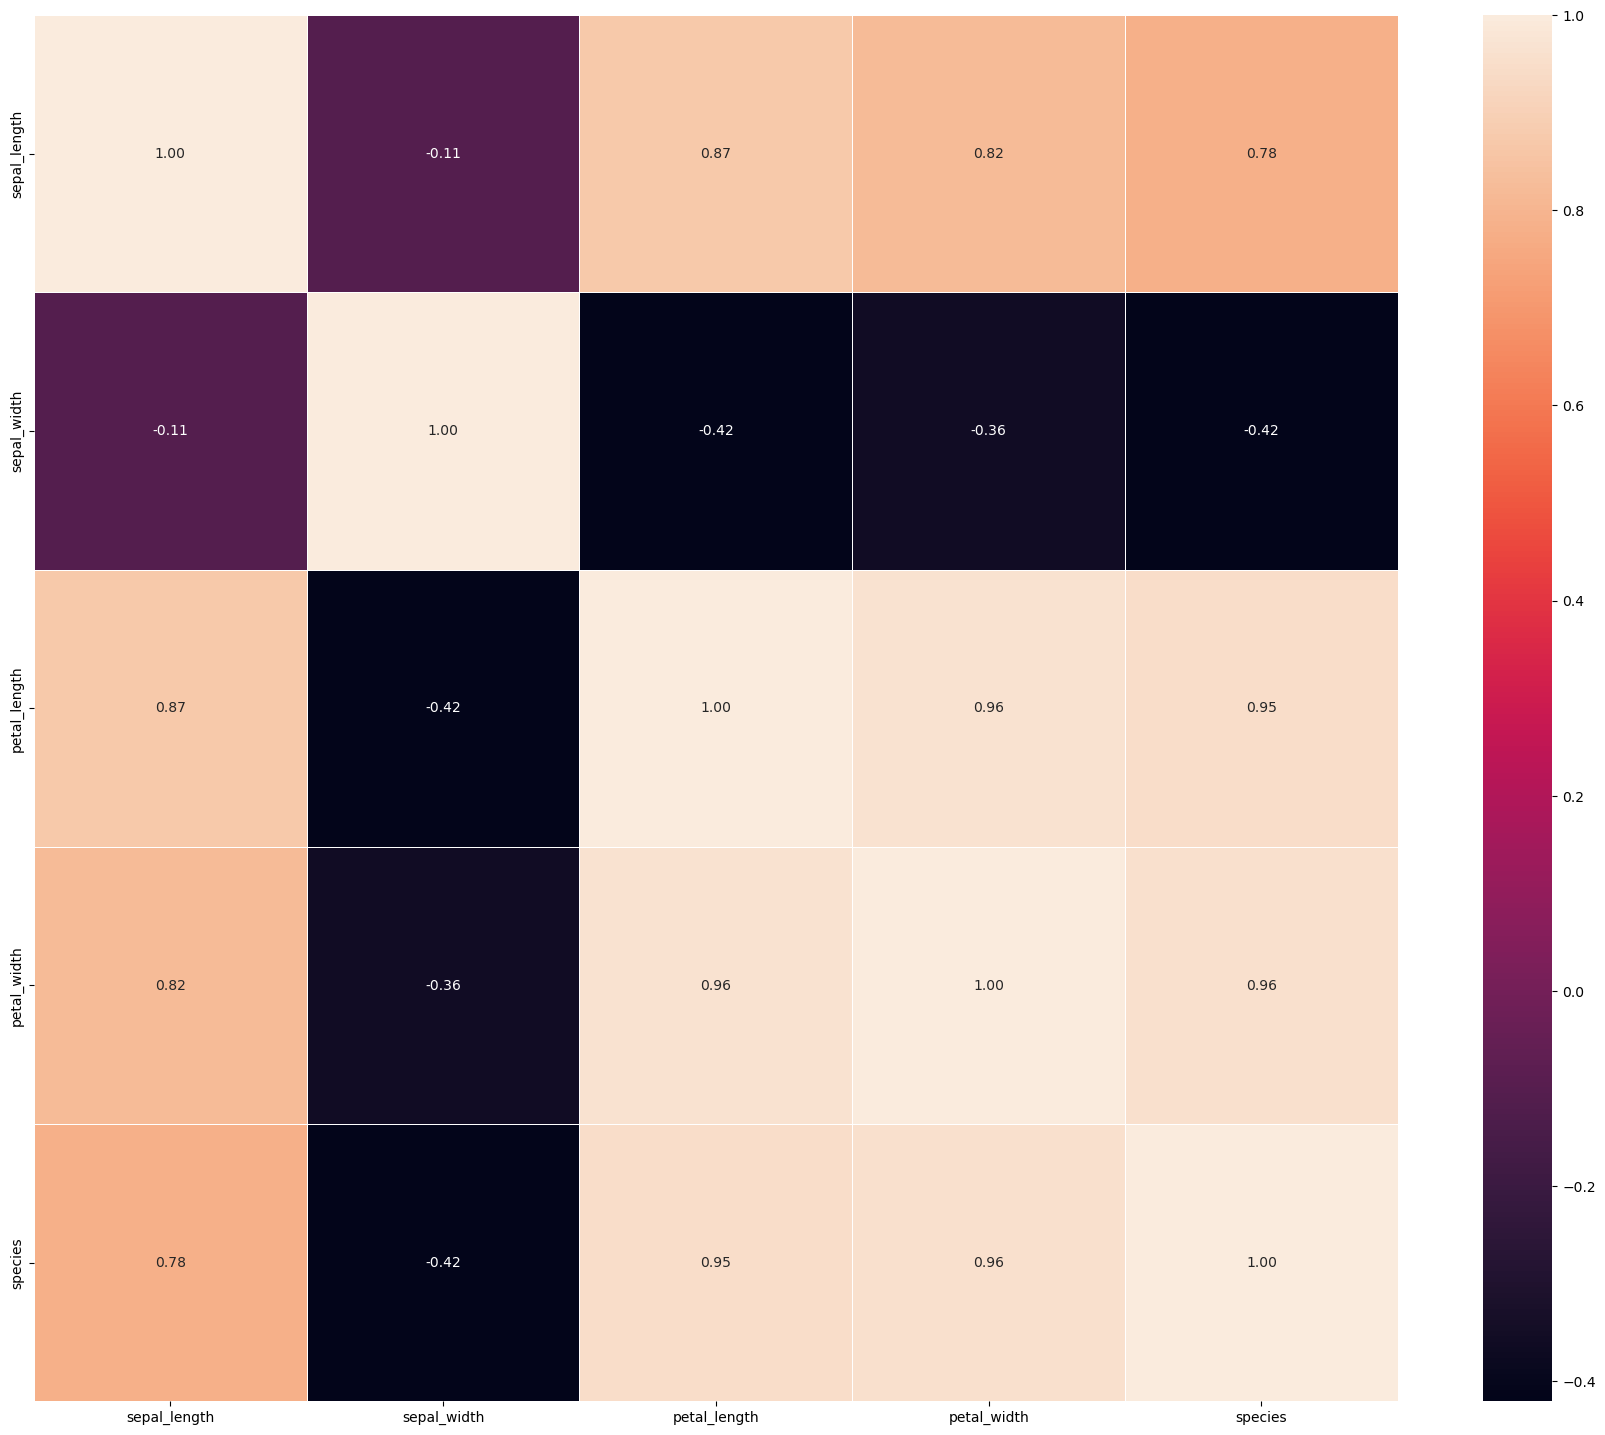

In [52]:
plt.figure(figsize=(22, 18))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

In [54]:
x=df.drop(columns=['species'])
y=df['species']
y=y.values.reshape(-1,1)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [56]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [58]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [60]:
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
Dt.score(X_train,y_train)

1.0

In [64]:
y_pred=Dt.predict(X_test)

In [66]:
print(accuracy_score(y_test,y_pred))

1.0


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


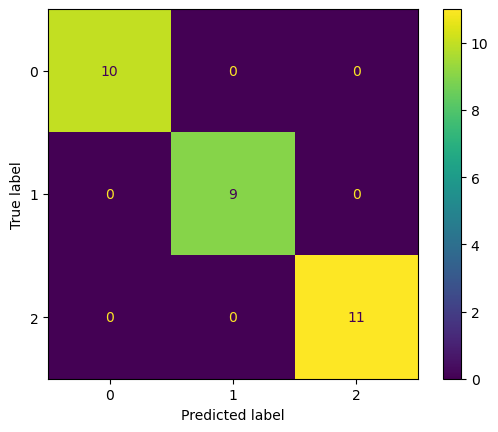

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

